In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data Preprocessing

##Load the data

In [5]:
Dataset_1= pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/Bibile_Monaragala_Kurunegala_Proper_Jaffna.csv",
                  names=["HCHO reading", "Location", "Current Date", "Next Date"])

Dataset_2= pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/ColomboP_Deniyaya_Matara_Nuwara Eliya.csv",
                  names=["HCHO reading", "Location", "Current Date", "Next Date"])

Kandy= pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/Kandy_Proper.csv",
                       names=["HCHO reading", "Location", "Current Date", "Next Date"])


In [6]:
Dataset_1["Current Date"] = pd.to_datetime(Dataset_1["Current Date"])
Dataset_2["Current Date"] = pd.to_datetime(Dataset_2["Current Date"])
Kandy["Current Date"] = pd.to_datetime(Kandy["Current Date"])

Dataset_1["Next Date"] = pd.to_datetime(Dataset_1["Next Date"])
Dataset_2["Next Date"] = pd.to_datetime(Dataset_2["Next Date"])
Kandy["Next Date"] = pd.to_datetime(Kandy["Next Date"])

In [7]:
Kurunegala = Dataset_1[Dataset_1["Location"] == "Kurunegala Proper"]
Bibile_Monaragala = Dataset_1[Dataset_1["Location"] == "Bibile, Monaragala"]
Jaffna = Dataset_1[Dataset_1["Location"] == "Jaffna Proper"]


Deniyaya_Matara = Dataset_2 [Dataset_2 ["Location"] == "Deniyaya, Matara"]
Colombo = Dataset_2 [Dataset_2 ["Location"] == "Colombo Proper"]
Eliya = Dataset_2 [Dataset_2 ["Location"] == "Nuwara Eliya Proper"]

## Handle Negative Values

In [8]:
print("Kurunegala Negative Values before Replacement :")
print((Kurunegala['HCHO reading'] < 0).sum())

Kurunegala.loc[Kurunegala['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Kurunegala Negative Values after Replacement :")
print((Kurunegala['HCHO reading'] < 0).sum())

Kurunegala Negative Values before Replacement :
56
Kurunegala Negative Values after Replacement :
0


In [9]:
print("Bibile_Monaragala Negative Values before Replacement:")
print((Bibile_Monaragala['HCHO reading'] < 0).sum())

Bibile_Monaragala.loc[Bibile_Monaragala['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Bibile_Monaragala Negative Values after Replacement:")
print((Bibile_Monaragala['HCHO reading'] < 0).sum())

Bibile_Monaragala Negative Values before Replacement:
79
Bibile_Monaragala Negative Values after Replacement:
0


In [10]:
print("Jaffna Negative Values before Replacement:")
print((Jaffna['HCHO reading'] < 0).sum())

Jaffna.loc[Jaffna['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Jaffna Negative Values after Replacement:")
print((Jaffna['HCHO reading'] < 0).sum())

Jaffna Negative Values before Replacement:
57
Jaffna Negative Values after Replacement:
0


In [11]:
print("Deniyaya_Matara Negative Values before Replacement:")
print((Deniyaya_Matara['HCHO reading'] < 0).sum())

Deniyaya_Matara.loc[Deniyaya_Matara['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Deniyaya_Matara Negative Values after Replacement:")
print((Deniyaya_Matara['HCHO reading'] < 0).sum())

Deniyaya_Matara Negative Values before Replacement:
115
Deniyaya_Matara Negative Values after Replacement:
0


In [12]:
print("Colombo Negative Values before Replacement:")
print((Colombo['HCHO reading'] < 0).sum())

Colombo.loc[Colombo['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Colombo Negative Values after Replacement:")
print((Colombo['HCHO reading'] < 0).sum())

Colombo Negative Values before Replacement:
52
Colombo Negative Values after Replacement:
0


In [13]:
print("Eliya Negative Values before Replacement:")
print((Eliya['HCHO reading'] < 0).sum())

Eliya.loc[Eliya['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Eliya Negative Values after Replacement:")
print((Eliya['HCHO reading'] < 0).sum())

Eliya Negative Values before Replacement:
96
Eliya Negative Values after Replacement:
0


In [14]:
print("Kandy Negative Values before Replacement:")
print((Kandy['HCHO reading'] < 0).sum())

Kandy.loc[Kandy['HCHO reading'] < 0, 'HCHO reading'] = pd.NA

print("Kandy Negative Values after Replacement:")
print((Kandy['HCHO reading'] < 0).sum())

Kandy Negative Values before Replacement:
108
Kandy Negative Values after Replacement:
0


## Handle null values

In [15]:
print("Kurunegala Before :")
print(Kurunegala.isnull().sum())

Kurunegala= Kurunegala.interpolate(method='linear')

print(" Kurunegala After:")
print(Kurunegala.isnull().sum())

Kurunegala Before :
HCHO reading    648
Location          0
Current Date      0
Next Date         0
dtype: int64
 Kurunegala After:
HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [16]:
print("Bibile,Monaragala Before:")
print(Bibile_Monaragala.isnull().sum())

Bibile_Monaragala= Bibile_Monaragala.interpolate(method='linear')

print("Bibile,Monaragala After:")
print(Bibile_Monaragala.isnull().sum())

Bibile,Monaragala Before:
HCHO reading    774
Location          0
Current Date      0
Next Date         0
dtype: int64
Bibile,Monaragala After:
HCHO reading    1
Location        0
Current Date    0
Next Date       0
dtype: int64


In [17]:
Bibile_Monaragala=Bibile_Monaragala.dropna()
print(Bibile_Monaragala.isnull().sum())

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [18]:
print("Jaffna Before :")
print(Jaffna.isnull().sum())

Jaffna= Jaffna.interpolate(method='linear')

print("Jaffna After:")
print(Jaffna.isnull().sum())

Jaffna Before :
HCHO reading    422
Location          0
Current Date      0
Next Date         0
dtype: int64
Jaffna After:
HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [19]:
print("Deniyaya,Matara Before:")
print(Deniyaya_Matara .isnull().sum())

Deniyaya_Matara= Deniyaya_Matara.interpolate(method='linear')

print("Deniyaya,Matara After:")
print(Deniyaya_Matara.isnull().sum())

Deniyaya,Matara Before:
HCHO reading    962
Location          0
Current Date      0
Next Date         0
dtype: int64
Deniyaya,Matara After:
HCHO reading    1
Location        0
Current Date    0
Next Date       0
dtype: int64


In [20]:
Deniyaya_Matara=Deniyaya_Matara.dropna()
print(Deniyaya_Matara.isnull().sum())

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [21]:
print("Colombo Before:")
print(Colombo.isnull().sum())

Colombo= Colombo.interpolate(method='linear')

print("Colombo After:")
print(Colombo.isnull().sum())

Colombo Before:
HCHO reading    539
Location          0
Current Date      0
Next Date         0
dtype: int64
Colombo After:
HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [22]:
print("Nuwara Eliya Before:")
print(Eliya.isnull().sum())

Eliya= Eliya.interpolate(method='linear')

print("Nuwara Eliya After:")
print(Eliya.isnull().sum())

Nuwara Eliya Before:
HCHO reading    1181
Location           0
Current Date       0
Next Date          0
dtype: int64
Nuwara Eliya After:
HCHO reading    2
Location        0
Current Date    0
Next Date       0
dtype: int64


In [23]:
Eliya=Eliya.dropna()
print(Eliya.isnull().sum())

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [24]:
print("Kandy Before:")
print(Kandy.isnull().sum())

Kandy=Kandy.interpolate(method='linear')

print("Kandy After:")
print(Kandy.isnull().sum())

Kandy Before:
HCHO reading    901
Location          0
Current Date      0
Next Date         0
dtype: int64
Kandy After:
HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


##Handle outliers

In [25]:
Kurunegala['HCHO reading'].describe()

count    1.826000e+03
mean     1.356069e-04
std      7.188418e-05
min      1.433376e-07
25%      8.437731e-05
50%      1.236306e-04
75%      1.787617e-04
max      5.032967e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

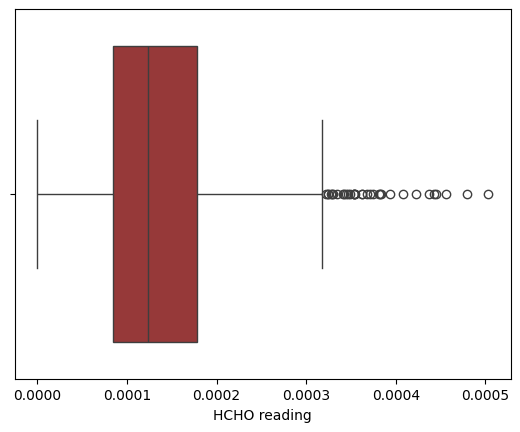

In [26]:
sns.boxplot(data=Kurunegala, x="HCHO reading",color='Brown')

In [27]:
Bibile_Monaragala['HCHO reading'].describe()

count    1.825000e+03
mean     1.327939e-04
std      7.560649e-05
min      1.461232e-07
25%      7.593534e-05
50%      1.240159e-04
75%      1.792057e-04
max      5.348281e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

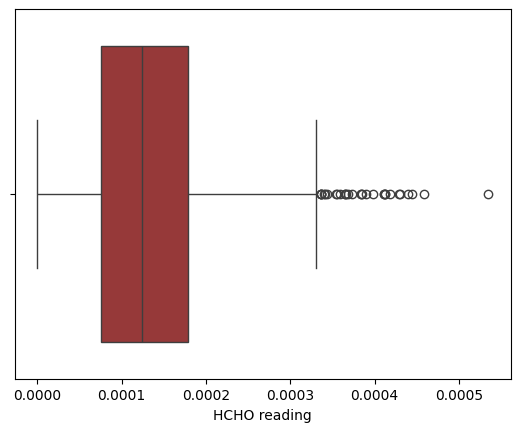

In [28]:
sns.boxplot(data=Bibile_Monaragala, x="HCHO reading",color='Brown')

In [29]:
Jaffna['HCHO reading'].describe()

count    1.826000e+03
mean     1.148577e-04
std      7.091155e-05
min      4.103467e-07
25%      6.709963e-05
50%      1.030505e-04
75%      1.460169e-04
max      5.837611e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

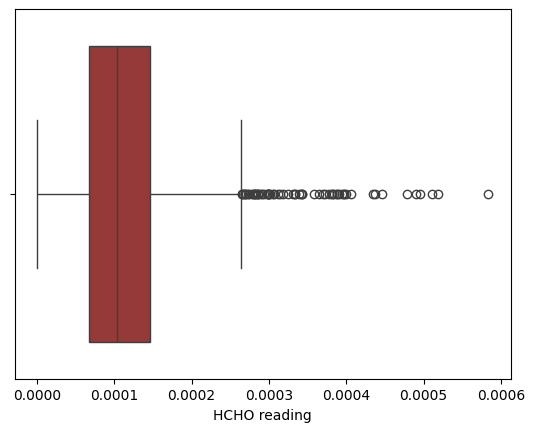

In [30]:
sns.boxplot(data=Jaffna, x="HCHO reading",color='Brown')

In [31]:
Deniyaya_Matara['HCHO reading'].describe()

count    1.825000e+03
mean     1.101406e-04
std      7.859755e-05
min      8.490000e-08
25%      5.920000e-05
50%      9.462133e-05
75%      1.450710e-04
max      8.997100e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

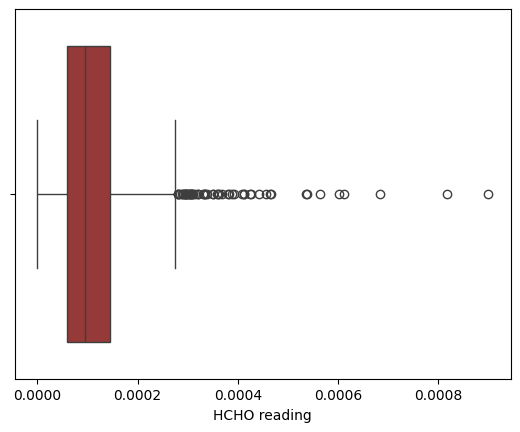

In [32]:
sns.boxplot(data=Deniyaya_Matara, x="HCHO reading",color='Brown')

In [33]:
Colombo['HCHO reading'].describe()

count    1.826000e+03
mean     1.616983e-04
std      8.626744e-05
min      2.110000e-07
25%      9.862642e-05
50%      1.498430e-04
75%      2.135956e-04
max      6.500630e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

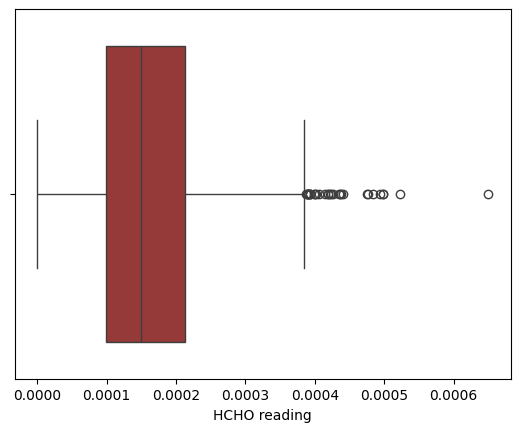

In [34]:
sns.boxplot(data=Colombo, x="HCHO reading",color='Brown')

In [35]:
Eliya['HCHO reading'].describe()

count    1.824000e+03
mean     1.034157e-04
std      6.210343e-05
min      4.360000e-07
25%      5.547500e-05
50%      9.337569e-05
75%      1.408349e-04
max      4.191360e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

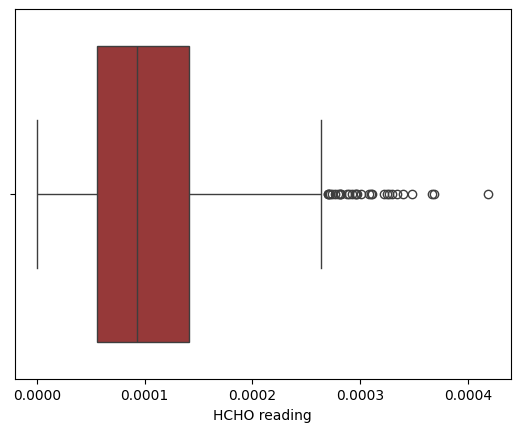

In [36]:
sns.boxplot(data=Eliya, x="HCHO reading",color='Brown')

In [37]:
Kandy['HCHO reading'].describe()

count    1.826000e+03
mean     1.187013e-04
std      7.168246e-05
min      1.570000e-07
25%      6.635775e-05
50%      1.082818e-04
75%      1.575832e-04
max      7.051620e-04
Name: HCHO reading, dtype: float64

<Axes: xlabel='HCHO reading'>

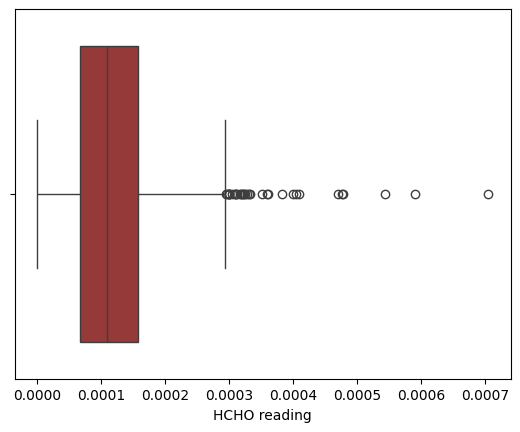

In [38]:
sns.boxplot(data=Kandy, x="HCHO reading",color='Brown')

In [39]:
def outliers(x):
  q1= x["HCHO reading"].quantile(0.25)
  q3= x["HCHO reading"].quantile(0.75)

  IQR = q3 - q1

  lower_bound= q1 - 1.5 * IQR
  upper_bound= q3 + 1.5 * IQR

  no_outliers = x[(x["HCHO reading"] >= lower_bound) & (x["HCHO reading"] <= upper_bound)]

  outliers_removed = len(x) - len(no_outliers)
  print("Outliers removed:", outliers_removed)

  return no_outliers

In [40]:
Kurunegala= outliers(Kurunegala)
Bibile_Monaragala= outliers(Bibile_Monaragala)
Jaffna= outliers(Jaffna)
Deniyaya_Matara= outliers(Deniyaya_Matara)
Colombo= outliers(Colombo)
Eliya= outliers(Eliya)
Kandy= outliers(Kandy)

Outliers removed: 33
Outliers removed: 31
Outliers removed: 64
Outliers removed: 57
Outliers removed: 31
Outliers removed: 30
Outliers removed: 33


In [41]:
Entire_dataset=pd.concat([Kurunegala,Bibile_Monaragala,Jaffna,Deniyaya_Matara,Colombo,Eliya,Kandy])
Entire_dataset['HCHO reading'].describe()

count    1.249900e+04
mean     1.198379e-04
std      6.646437e-05
min      8.490000e-08
25%      6.940037e-05
50%      1.102209e-04
75%      1.620083e-04
max      3.848620e-04
Name: HCHO reading, dtype: float64

In [42]:
Entire_dataset.head()

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,0.000198,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06


In [43]:
Entire_dataset.shape

(12499, 4)

##Histogram Visualization

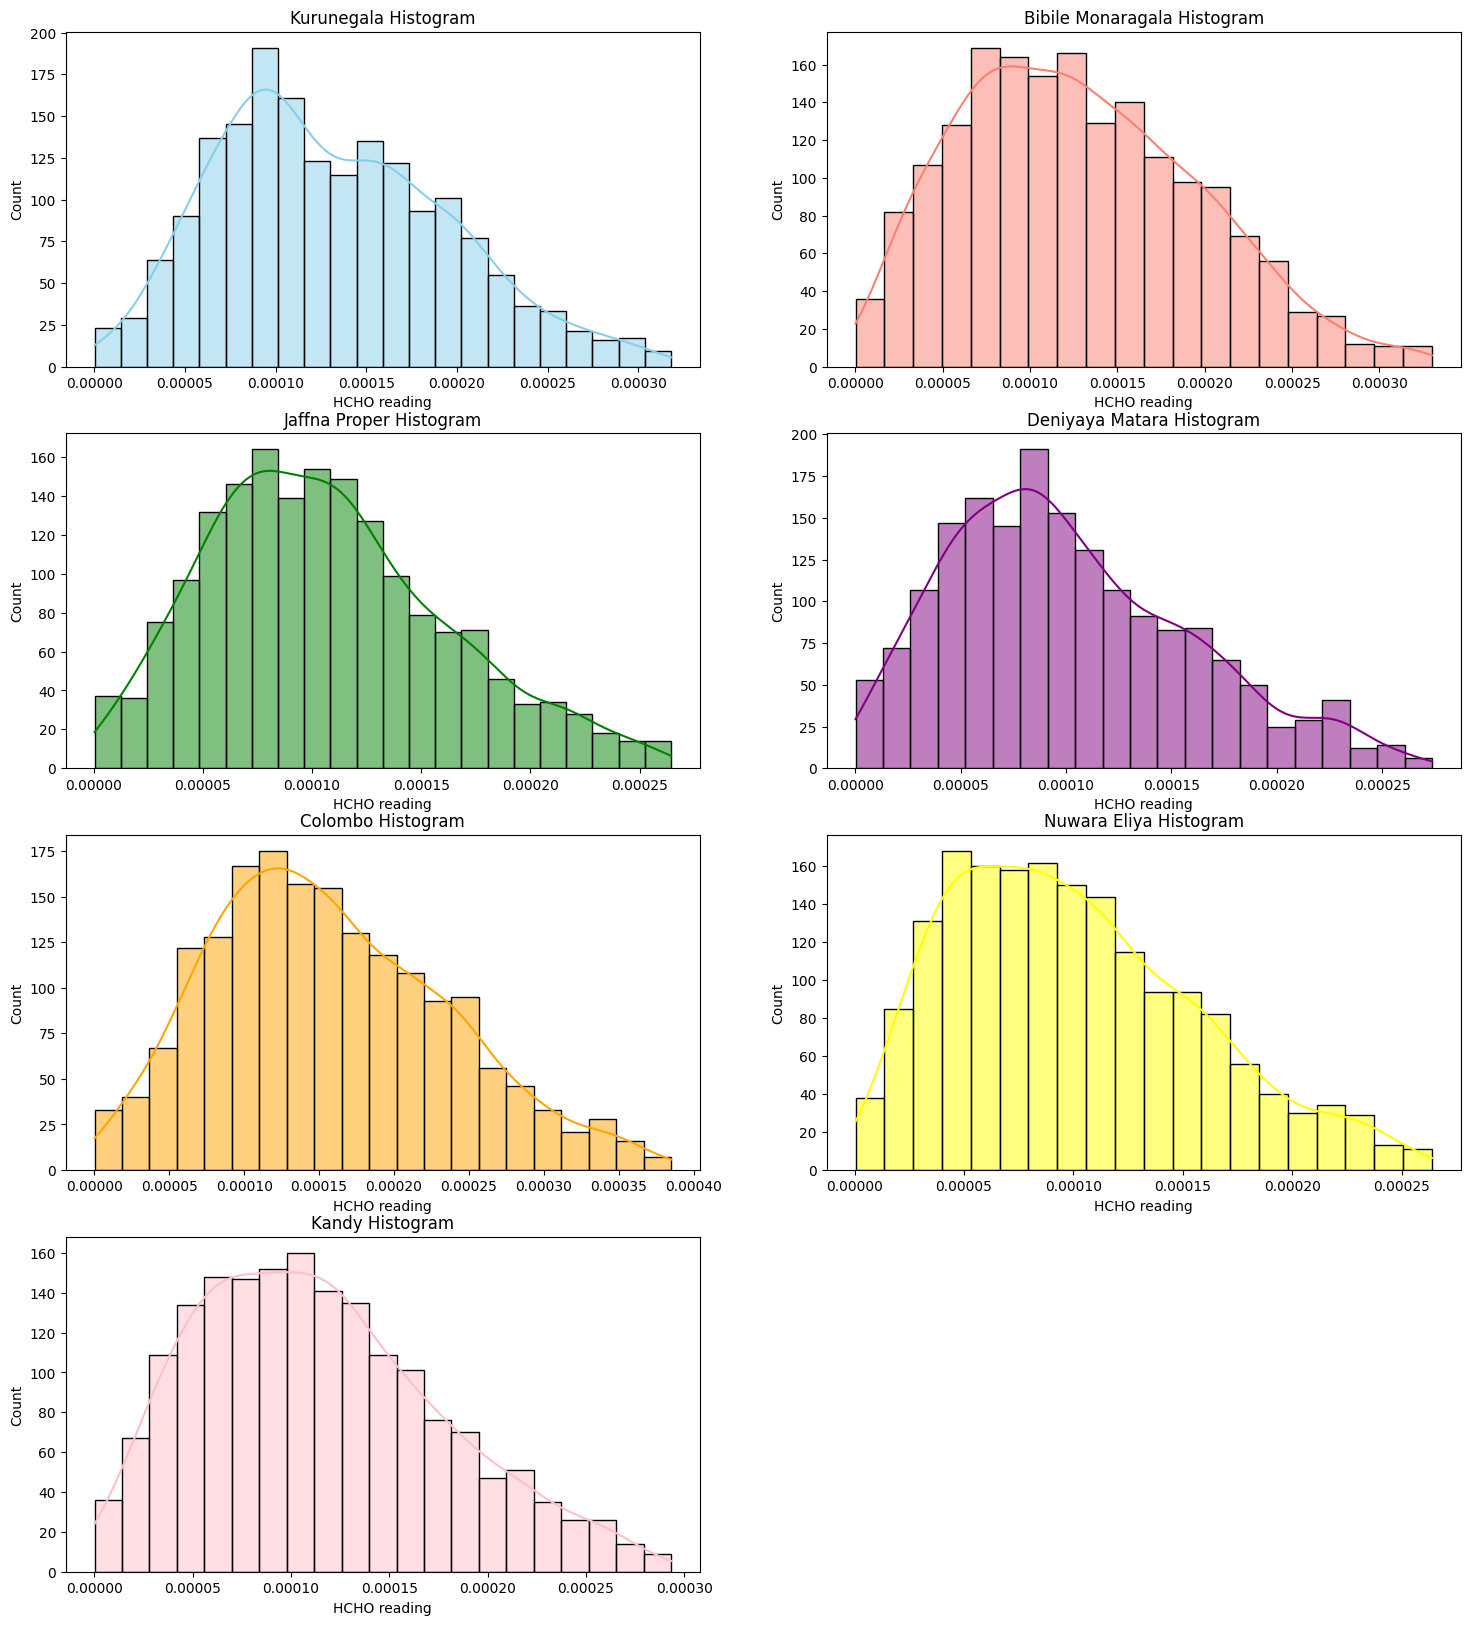

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
sns.histplot(data=Kurunegala, x="HCHO reading", ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title("Kurunegala Histogram")

sns.histplot(data=Bibile_Monaragala, x="HCHO reading", ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title("Bibile Monaragala Histogram")

sns.histplot(data=Jaffna, x="HCHO reading", ax=axes[1, 0], kde=True, color='green')
axes[1, 0].set_title("Jaffna Proper Histogram")

sns.histplot(data=Deniyaya_Matara, x="HCHO reading", ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title("Deniyaya Matara Histogram")

sns.histplot(data=Colombo, x="HCHO reading", ax=axes[2, 0], kde=True, color='orange')
axes[2, 0].set_title("Colombo Histogram")

sns.histplot(data=Eliya, x="HCHO reading", ax=axes[2, 1], kde=True, color='yellow')
axes[2, 1].set_title("Nuwara Eliya Histogram")

sns.histplot(data=Kandy, x="HCHO reading", ax=axes[3, 0], kde=True, color='pink')
axes[3, 0].set_title("Kandy Histogram")

fig.delaxes(axes[3,1])

In [45]:
Entire_dataset.to_csv('Entire_dataset.csv')

# Spatio - Temporal Analysis

##Long term trends with time series analysis

In [46]:
def moving_average(data, window_size):
  return data.rolling(window=window_size).mean()
window_size= 30

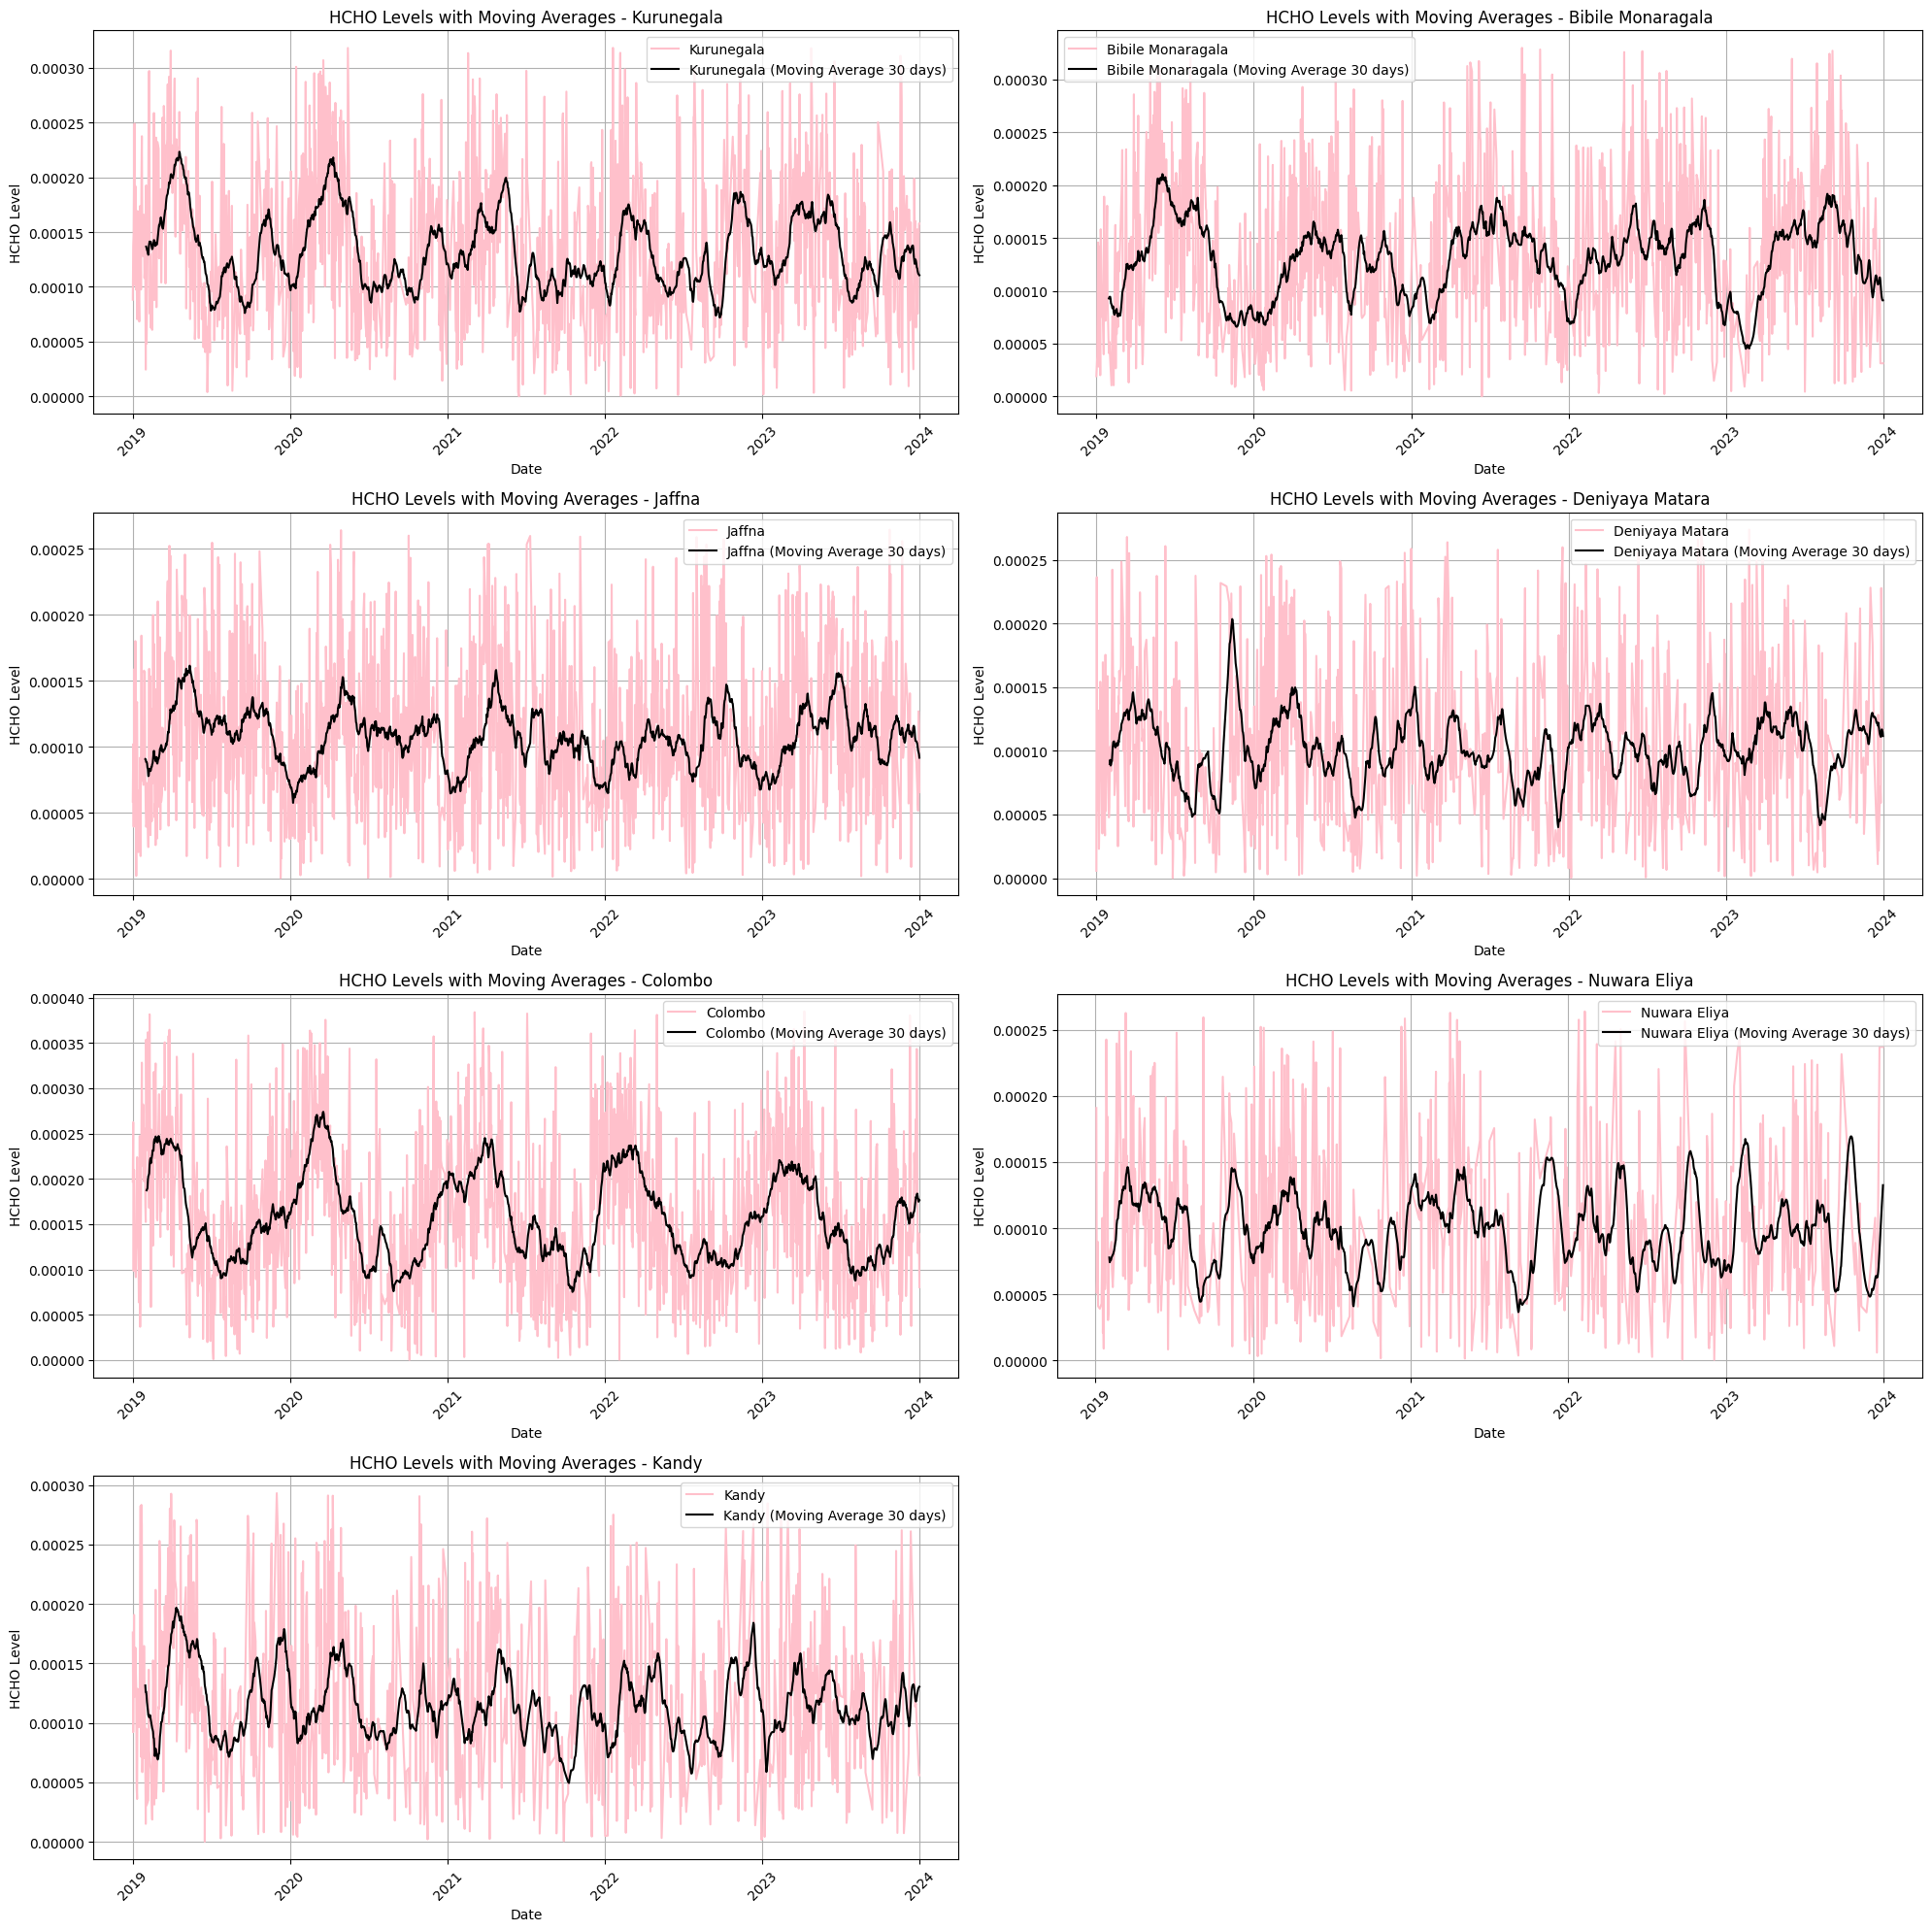

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Plot Kurunegala
kurunegala_longtrend = moving_average(Kurunegala['HCHO reading'], window_size)
axes[0, 0].plot(Kurunegala['Current Date'], Kurunegala['HCHO reading'], label='Kurunegala', color='pink')
axes[0, 0].plot(Kurunegala['Current Date'], kurunegala_longtrend, label=f'Kurunegala (Moving Average {window_size} days)', color='black')
axes[0, 0].set_title('HCHO Levels with Moving Averages - Kurunegala')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('HCHO Level')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Bibile Monaragala
bibile_monaragala_longtrend = moving_average(Bibile_Monaragala['HCHO reading'], window_size)
axes[0, 1].plot(Bibile_Monaragala['Current Date'], Bibile_Monaragala['HCHO reading'], label='Bibile Monaragala', color='pink')
axes[0, 1].plot(Bibile_Monaragala['Current Date'], bibile_monaragala_longtrend, label=f'Bibile Monaragala (Moving Average {window_size} days)', color='black')
axes[0, 1].set_title('HCHO Levels with Moving Averages - Bibile Monaragala')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('HCHO Level')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Jaffna
jaffna_longtrend = moving_average(Jaffna['HCHO reading'], window_size)
axes[1, 0].plot(Jaffna['Current Date'], Jaffna['HCHO reading'], label='Jaffna', color='pink')
axes[1, 0].plot(Jaffna['Current Date'], jaffna_longtrend, label=f'Jaffna (Moving Average {window_size} days)', color='black')
axes[1, 0].set_title('HCHO Levels with Moving Averages - Jaffna')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('HCHO Level')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Deniyaya Matara
deniyaya_matara_longtrend = moving_average(Deniyaya_Matara['HCHO reading'], window_size)
axes[1, 1].plot(Deniyaya_Matara['Current Date'], Deniyaya_Matara['HCHO reading'], label='Deniyaya Matara', color='pink')
axes[1, 1].plot(Deniyaya_Matara['Current Date'], deniyaya_matara_longtrend, label=f'Deniyaya Matara (Moving Average {window_size} days)', color='black')
axes[1, 1].set_title('HCHO Levels with Moving Averages - Deniyaya Matara')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('HCHO Level')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Colombo
colombo_longtrend = moving_average(Colombo['HCHO reading'], window_size)
axes[2, 0].plot(Colombo['Current Date'], Colombo['HCHO reading'], label='Colombo', color='pink')
axes[2, 0].plot(Colombo['Current Date'], colombo_longtrend, label=f'Colombo (Moving Average {window_size} days)', color='black')
axes[2, 0].set_title('HCHO Levels with Moving Averages - Colombo')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('HCHO Level')
axes[2, 0].legend()
axes[2, 0].grid(True)
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot Nuwara Eliya
nuwara_eliya_longtrend = moving_average(Eliya['HCHO reading'], window_size)
axes[2, 1].plot(Eliya['Current Date'], Eliya['HCHO reading'], label='Nuwara Eliya', color='pink')
axes[2, 1].plot(Eliya['Current Date'], nuwara_eliya_longtrend, label=f'Nuwara Eliya (Moving Average {window_size} days)', color='black')
axes[2, 1].set_title('HCHO Levels with Moving Averages - Nuwara Eliya')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('HCHO Level')
axes[2, 1].legend()
axes[2, 1].grid(True)
axes[2, 1].tick_params(axis='x', rotation=45)

# Plot Kandy
kandy_longtrend = moving_average(Kandy['HCHO reading'], window_size)
axes[3, 0].plot(Kandy['Current Date'], Kandy['HCHO reading'], label='Kandy', color='pink')
axes[3, 0].plot(Kandy['Current Date'], kandy_longtrend, label=f'Kandy (Moving Average {window_size} days)', color='black')
axes[3, 0].set_title('HCHO Levels with Moving Averages - Kandy')
axes[3, 0].set_xlabel('Date')
axes[3, 0].set_ylabel('HCHO Level')
axes[3, 0].legend()
axes[3, 0].grid(True)
axes[3, 0].tick_params(axis='x', rotation=45)

axes[3, 1].axis('off')
plt.tight_layout()
plt.show()


##  Precipitation & Total Average Temparature

In [48]:
Colombo_new=pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/Colombo.csv")
Kurunegala_new=pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/Kurunegala.csv")
NuwaraEliya_new=pd.read_csv("/content/drive/MyDrive/Formaldehyde-HCHO-Monitoring-in-Sri-Lanka-/NuwaraEliya.csv")

In [49]:
Colombo_new["Date"] = pd.to_datetime(Colombo_new["Date"])
Kurunegala_new["Date"] = pd.to_datetime(Kurunegala_new["Date"])
NuwaraEliya_new["Date"] = pd.to_datetime(NuwaraEliya_new["Date"])

In [50]:
Colombo_new= Colombo_new.rename(columns={"Date": "Current Date"})
Kurunegala_new= Kurunegala_new.rename(columns={"Date": "Current Date"})
NuwaraEliya_new= NuwaraEliya_new.rename(columns={"Date": "Current Date"})

###Handle Null Values

In [51]:
print("Colombo_new null values:")
print(Colombo_new.isnull().sum())

print("\nKurunegala_new null values:")
print(Kurunegala_new.isnull().sum())

print("\nNuwaraEliya_new null values:")
print(NuwaraEliya_new.isnull().sum())

Colombo_new null values:
Current Date                  0
TAVG (Degrees Fahrenheit)    61
PRCP (Inches)                70
dtype: int64

Kurunegala_new null values:
Current Date                   0
TAVG (Degrees Fahrenheit)    122
PRCP (Inches)                125
dtype: int64

NuwaraEliya_new null values:
Current Date                  0
TAVG (Degrees Fahrenheit)    65
PRCP (Inches)                70
dtype: int64


In [52]:
Colombo_new = Colombo_new.interpolate(method='linear')
Kurunegala_new = Kurunegala_new.interpolate(method='linear')
NuwaraEliya_new = NuwaraEliya_new.interpolate(method='linear')

In [53]:
print("Colombo_new null values:")
print(Colombo_new.isnull().sum())

print("\nKurunegala_new null values:")
print(Kurunegala_new.isnull().sum())

print("\nNuwaraEliya_new null values:")
print(NuwaraEliya_new.isnull().sum())

Colombo_new null values:
Current Date                 0
TAVG (Degrees Fahrenheit)    0
PRCP (Inches)                0
dtype: int64

Kurunegala_new null values:
Current Date                 0
TAVG (Degrees Fahrenheit)    1
PRCP (Inches)                1
dtype: int64

NuwaraEliya_new null values:
Current Date                 0
TAVG (Degrees Fahrenheit)    0
PRCP (Inches)                0
dtype: int64


In [54]:
Kurunegala_new=Kurunegala_new.dropna()

In [55]:
print("\nKurunegala_new null values:")
print(Kurunegala_new.isnull().sum())


Kurunegala_new null values:
Current Date                 0
TAVG (Degrees Fahrenheit)    0
PRCP (Inches)                0
dtype: int64


### Handle Outliers

In [56]:
print("Colombo_new:")
print(Colombo_new[['TAVG (Degrees Fahrenheit)', 'PRCP (Inches)']].describe())

print("\nKurunegala_new:")
print(Kurunegala_new[['TAVG (Degrees Fahrenheit)','PRCP (Inches)']].describe())

print("\nNuwaraEliya_new:")
print(NuwaraEliya_new[['TAVG (Degrees Fahrenheit)','PRCP (Inches)']].describe())

Colombo_new:
       TAVG (Degrees Fahrenheit)  PRCP (Inches)
count                1826.000000    1826.000000
mean                   82.437295       0.286632
std                     1.998253       0.644776
min                    75.000000       0.000000
25%                    81.000000       0.000000
50%                    83.000000       0.010000
75%                    84.000000       0.240000
max                    87.000000       5.940000

Kurunegala_new:
       TAVG (Degrees Fahrenheit)  PRCP (Inches)
count                1825.000000    1825.000000
mean                   81.748767       0.231877
std                     2.729244       0.582953
min                    69.000000       0.000000
25%                    80.000000       0.000000
50%                    82.000000       0.000000
75%                    83.333333       0.170000
max                    92.000000       7.430000

NuwaraEliya_new:
       TAVG (Degrees Fahrenheit)  PRCP (Inches)
count                1826.000000    1826

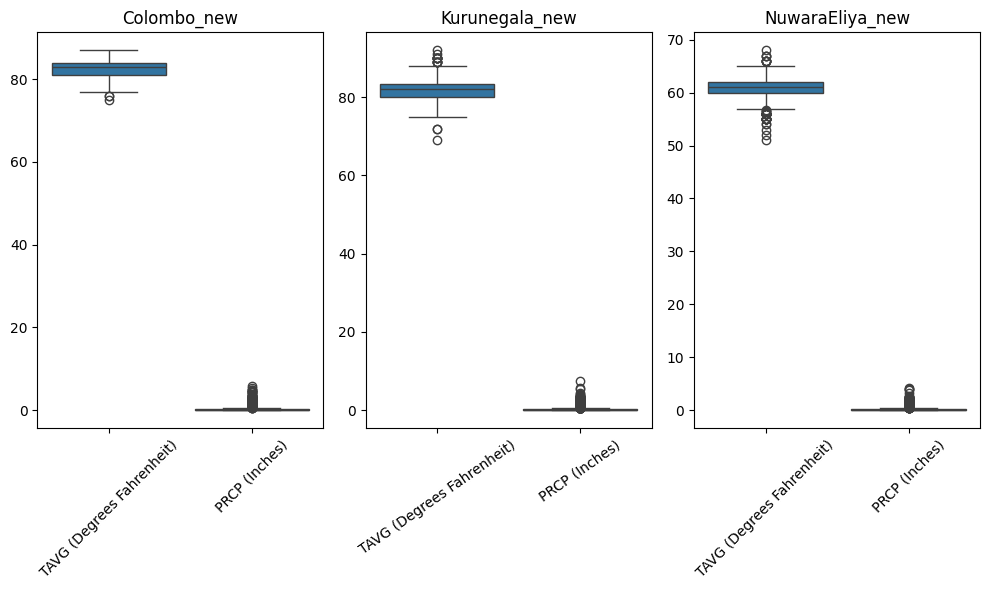

In [57]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=Colombo_new)
plt.xticks(rotation=45)
plt.title('Colombo_new')

plt.subplot(1, 3, 2)
sns.boxplot(data=Kurunegala_new)
plt.xticks(rotation=35)
plt.title('Kurunegala_new')

plt.subplot(1, 3, 3)
sns.boxplot(data=NuwaraEliya_new)
plt.xticks(rotation=45)
plt.title('NuwaraEliya_new')

plt.tight_layout()
plt.show()

In [58]:
def outliers(x):
  q1= x["PRCP (Inches)"].quantile(0.25)
  q3= x["PRCP (Inches)"].quantile(0.75)

  IQR = q3 - q1

  lower_bound= q1 - 1.5 * IQR
  upper_bound= q3 + 1.5 * IQR

  no_outliers = x[(x["PRCP (Inches)"] >= lower_bound) & (x["PRCP (Inches)"] <= upper_bound)]

  outliers_removed = len(x) - len(no_outliers)
  print("Outliers removed:", outliers_removed)

  return no_outliers

In [59]:
Colombo_new= outliers(Colombo_new)
Kurunegala_new= outliers(Kurunegala_new)
NuwaraEliya_new= outliers(NuwaraEliya_new)

Outliers removed: 273
Outliers removed: 276
Outliers removed: 252


In [60]:
def outliers_degree(x):
  q1= x["TAVG (Degrees Fahrenheit)"].quantile(0.25)
  q3= x["TAVG (Degrees Fahrenheit)"].quantile(0.75)

  IQR = q3 - q1

  lower_bound= q1 - 1.5 * IQR
  upper_bound= q3 + 1.5 * IQR

  no_outliers = x[(x["TAVG (Degrees Fahrenheit)"] >= lower_bound) & (x["TAVG (Degrees Fahrenheit)"] <= upper_bound)]

  outliers_removed = len(x) - len(no_outliers)
  print("Outliers removed:", outliers_removed)

  return no_outliers

In [61]:
Colombo_new= outliers_degree(Colombo_new)
Kurunegala_new= outliers_degree(Kurunegala_new)
NuwaraEliya_new= outliers_degree(NuwaraEliya_new)

Outliers removed: 1
Outliers removed: 3
Outliers removed: 45


### Merge the data

In [62]:
Colombo= pd.merge(Colombo,Colombo_new, on='Current Date', how='inner')
Colombo.head()

,HCHO reading,Location,Current Date,Next Date,TAVG (Degrees Fahrenheit),PRCP (Inches)
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,81.0,0.0
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,78.0,0.0
2,0.000098,Colombo Proper,2019-01-03,2019-01-04,81.0,0.0
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,81.0,0.0
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,81.0,0.0


In [63]:
Kurunegala=pd.merge(Kurunegala,Kurunegala_new, on='Current Date', how='inner')
Kurunegala.head()

,HCHO reading,Location,Current Date,Next Date,TAVG (Degrees Fahrenheit),PRCP (Inches)
0,0.000137,Kurunegala Proper,2019-01-02,2019-01-03,78.0,0.0
1,0.000148,Kurunegala Proper,2019-01-03,2019-01-04,81.0,0.0
2,0.000198,Kurunegala Proper,2019-01-04,2019-01-05,83.0,0.0
3,0.000249,Kurunegala Proper,2019-01-05,2019-01-06,84.0,0.0
4,0.000102,Kurunegala Proper,2019-01-06,2019-01-07,82.0,0.0


In [64]:
NuwaraEliya=pd.merge(Eliya,NuwaraEliya_new, on='Current Date', how='inner')
NuwaraEliya.head()

,HCHO reading,Location,Current Date,Next Date,TAVG (Degrees Fahrenheit),PRCP (Inches)
0,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04,59.0,0.0
1,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05,59.0,0.0
2,0.000090,Nuwara Eliya Proper,2019-01-06,2019-01-07,59.0,0.0
3,0.000041,Nuwara Eliya Proper,2019-01-07,2019-01-08,59.0,0.0
4,0.000041,Nuwara Eliya Proper,2019-01-08,2019-01-09,59.0,0.0


In [65]:
PRCP_TAVG=pd.concat([Colombo,Kurunegala,NuwaraEliya])
PRCP_TAVG.to_csv('PRCP_TAVG.csv')

In [66]:
PRCP_TAVG.head()

,HCHO reading,Location,Current Date,Next Date,TAVG (Degrees Fahrenheit),PRCP (Inches)
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,81.0,0.0
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,78.0,0.0
2,0.000098,Colombo Proper,2019-01-03,2019-01-04,81.0,0.0
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,81.0,0.0
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,81.0,0.0


### Visualization

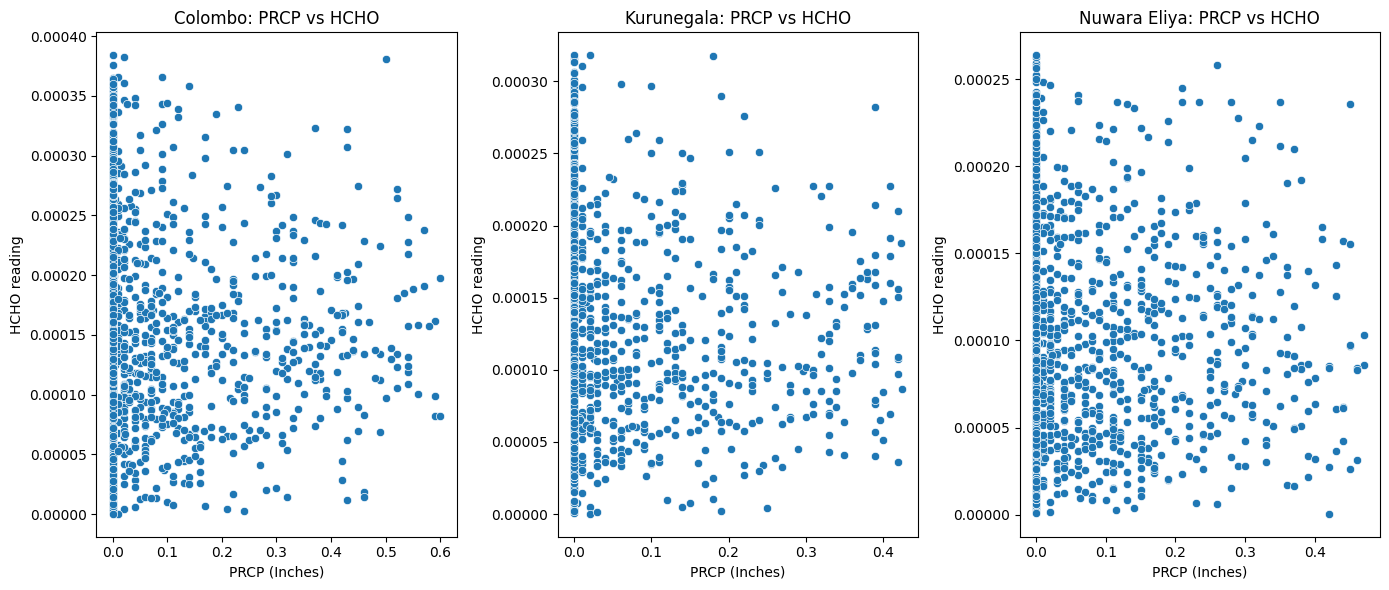

In [67]:
# Plot PRCP vs HCHO
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=Colombo, x='PRCP (Inches)', y='HCHO reading')
plt.title('Colombo: PRCP vs HCHO')

plt.subplot(1, 3, 2)
sns.scatterplot(data=Kurunegala, x='PRCP (Inches)', y='HCHO reading')
plt.title('Kurunegala: PRCP vs HCHO')

plt.subplot(1, 3, 3)
sns.scatterplot(data=NuwaraEliya, x='PRCP (Inches)', y='HCHO reading')
plt.title('Nuwara Eliya: PRCP vs HCHO')

plt.tight_layout()
plt.show()




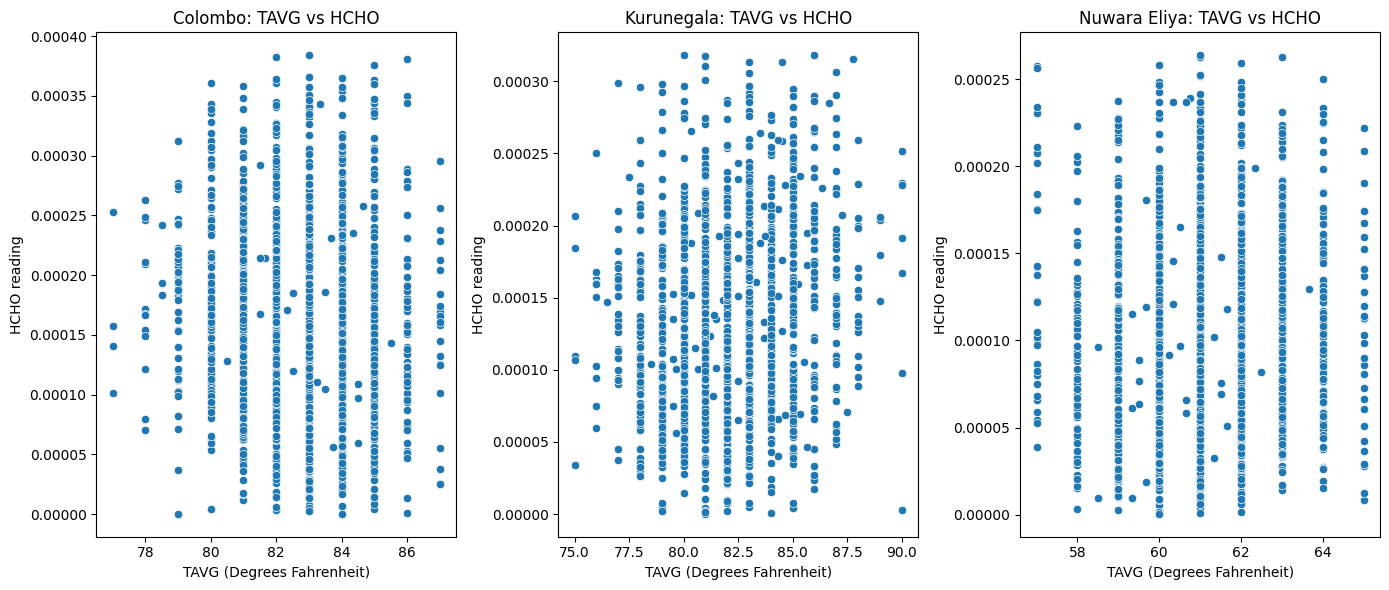

In [68]:
# Plot TAVG vs HCHO
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=Colombo, x='TAVG (Degrees Fahrenheit)', y='HCHO reading')
plt.title('Colombo: TAVG vs HCHO')

plt.subplot(1, 3, 2)
sns.scatterplot(data=Kurunegala, x='TAVG (Degrees Fahrenheit)', y='HCHO reading')
plt.title('Kurunegala: TAVG vs HCHO')

plt.subplot(1, 3, 3)
sns.scatterplot(data=NuwaraEliya, x='TAVG (Degrees Fahrenheit)', y='HCHO reading')
plt.title('Nuwara Eliya: TAVG vs HCHO')

plt.tight_layout()
plt.show()

### Coorelation

In [69]:
# Calculate correlation coefficients for each city
colombo_corr = Colombo['HCHO reading'].corr(Colombo['TAVG (Degrees Fahrenheit)'])
kurunegala_corr = Kurunegala['HCHO reading'].corr(Kurunegala['TAVG (Degrees Fahrenheit)'])
nuwaraeliya_corr = NuwaraEliya['HCHO reading'].corr(NuwaraEliya['TAVG (Degrees Fahrenheit)'])

print("Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Colombo:", colombo_corr)
print("Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Kurunegala:", kurunegala_corr)
print("Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Nuwara Eliya:", nuwaraeliya_corr)

# Calculate correlation coefficients for each city
colombo_corr =Colombo['HCHO reading'] .corr(Colombo['PRCP (Inches)'])
kurunegala_corr = Kurunegala['HCHO reading'].corr(Kurunegala['PRCP (Inches)'])
nuwaraeliya_corr = NuwaraEliya['HCHO reading'].corr(NuwaraEliya['PRCP (Inches)'])

print("\nCorrelation coefficient between HCHO reading and PRCP (Inches) in Colombo:", colombo_corr)
print("Correlation coefficient between HCHO reading and PRCP (Inches) in Kurunegala:", kurunegala_corr)
print("Correlation coefficient between HCHO reading and PRCP (Inches) in Nuwara Eliya:", nuwaraeliya_corr)


Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Colombo: -0.13371205706700529
Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Kurunegala: 0.1559062948979419
Correlation coefficient between HCHO reading and TAVG (Degrees Fahrenheit) in Nuwara Eliya: 0.04961733128163779

Correlation coefficient between HCHO reading and PRCP (Inches) in Colombo: -0.0696740824200639
Correlation coefficient between HCHO reading and PRCP (Inches) in Kurunegala: -0.07528033832893553
Correlation coefficient between HCHO reading and PRCP (Inches) in Nuwara Eliya: -0.02289704012632652


## Population Density

In [70]:
# Kurunegala
Kurunegala['year'] = Kurunegala['Current Date'].dt.year
Kurunegala_2019 = Kurunegala[Kurunegala['year'] == 2019]
Average_Kurunegala_2019 = Kurunegala_2019['HCHO reading'].mean()
print("Kurunegala - HCHO Average 2019: {:.6f}".format(Average_Kurunegala_2019))

Kurunegala_2020 = Kurunegala[Kurunegala['year'] == 2020]
Average_Kurunegala_2020 = Kurunegala_2020['HCHO reading'].mean()
print("Kurunegala - HCHO Average 2020: {:.6f}".format(Average_Kurunegala_2020))

Kurunegala_2021 = Kurunegala[Kurunegala['year'] == 2021]
Average_Kurunegala_2021 = Kurunegala_2021['HCHO reading'].mean()
print("Kurunegala - HCHO Average 2021: {:.6f}".format(Average_Kurunegala_2021))

Kurunegala_2022 = Kurunegala[Kurunegala['year'] == 2022]
Average_Kurunegala_2022 = Kurunegala_2022['HCHO reading'].mean()
print("Kurunegala - HCHO Average 2022: {:.6f}".format(Average_Kurunegala_2022))
print("\n")

# Bibile Monaragala
Bibile_Monaragala['year'] = Bibile_Monaragala['Current Date'].dt.year
Bibile_Monaragala_2019 = Bibile_Monaragala[Bibile_Monaragala['year'] == 2019]
Average_Bibile_Monaragala_2019 = Bibile_Monaragala_2019['HCHO reading'].mean()
print("Bibile Monaragala - HCHO Average 2019: {:.6f}".format(Average_Bibile_Monaragala_2019))

Bibile_Monaragala_2020 = Bibile_Monaragala[Bibile_Monaragala['year'] == 2020]
Average_Bibile_Monaragala_2020 = Bibile_Monaragala_2020['HCHO reading'].mean()
print("Bibile Monaragala - HCHO Average 2020: {:.6f}".format(Average_Bibile_Monaragala_2020))

Bibile_Monaragala_2021 = Bibile_Monaragala[Bibile_Monaragala['year'] == 2021]
Average_Bibile_Monaragala_2021 = Bibile_Monaragala_2021['HCHO reading'].mean()
print("Bibile Monaragala - HCHO Average 2021: {:.6f}".format(Average_Bibile_Monaragala_2021))

Bibile_Monaragala_2022 = Bibile_Monaragala[Bibile_Monaragala['year'] == 2022]
Average_Bibile_Monaragala_2022 = Bibile_Monaragala_2022['HCHO reading'].mean()
print("Bibile Monaragala - HCHO Average 2022: {:.6f}".format(Average_Bibile_Monaragala_2022))
print("\n")

# Jaffna
Jaffna['year'] = Jaffna['Current Date'].dt.year
Jaffna_2019 = Jaffna[Jaffna['year'] == 2019]
Average_Jaffna_2019 = Jaffna_2019['HCHO reading'].mean()
print("Jaffna - HCHO Average 2019: {:.6f}".format(Average_Jaffna_2019))

Jaffna_2020 = Jaffna[Jaffna['year'] == 2020]
Average_Jaffna_2020 = Jaffna_2020['HCHO reading'].mean()
print("Jaffna - HCHO Average 2020: {:.6f}".format(Average_Jaffna_2020))

Jaffna_2021 = Jaffna[Jaffna['year'] == 2021]
Average_Jaffna_2021 = Jaffna_2021['HCHO reading'].mean()
print("Jaffna - HCHO Average 2021: {:.6f}".format(Average_Jaffna_2021))

Jaffna_2022 = Jaffna[Jaffna['year'] == 2022]
Average_Jaffna_2022 = Jaffna_2022['HCHO reading'].mean()
print("Jaffna - HCHO Average 2022: {:.6f}".format(Average_Jaffna_2022))
print("\n")

# Deniyaya Matara
Deniyaya_Matara['year'] = Deniyaya_Matara['Current Date'].dt.year
Deniyaya_Matara_2019 = Deniyaya_Matara[Deniyaya_Matara['year'] == 2019]
Average_Deniyaya_Matara_2019 = Deniyaya_Matara_2019['HCHO reading'].mean()
print("Deniyaya Matara - HCHO Average 2019: {:.6f}".format(Average_Deniyaya_Matara_2019))

Deniyaya_Matara_2020 = Deniyaya_Matara[Deniyaya_Matara['year'] == 2020]
Average_Deniyaya_Matara_2020 = Deniyaya_Matara_2020['HCHO reading'].mean()
print("Deniyaya Matara - HCHO Average 2020: {:.6f}".format(Average_Deniyaya_Matara_2020))

Deniyaya_Matara_2021 = Deniyaya_Matara[Deniyaya_Matara['year'] == 2021]
Average_Deniyaya_Matara_2021 = Deniyaya_Matara_2021['HCHO reading'].mean()
print("Deniyaya Matara - HCHO Average 2021: {:.6f}".format(Average_Deniyaya_Matara_2021))

Deniyaya_Matara_2022 = Deniyaya_Matara[Deniyaya_Matara['year'] == 2022]
Average_Deniyaya_Matara_2022 = Deniyaya_Matara_2022['HCHO reading'].mean()
print("Deniyaya Matara - HCHO Average 2022: {:.6f}".format(Average_Deniyaya_Matara_2022))
print("\n")

# Colombo
Colombo['year'] = Colombo['Current Date'].dt.year
Colombo_2019 = Colombo[Colombo['year'] == 2019]
Average_Colombo_2019 = Colombo_2019['HCHO reading'].mean()
print("Colombo - HCHO Average 2019: {:.6f}".format(Average_Colombo_2019))

Colombo_2020 = Colombo[Colombo['year'] == 2020]
Average_Colombo_2020 = Colombo_2020['HCHO reading'].mean()
print("Colombo - HCHO Average 2020: {:.6f}".format(Average_Colombo_2020))

Colombo_2021 = Colombo[Colombo['year'] == 2021]
Average_Colombo_2021 = Colombo_2021['HCHO reading'].mean()
print("Colombo - HCHO Average 2021: {:.6f}".format(Average_Colombo_2021))

Colombo_2022 = Colombo[Colombo['year'] == 2022]
Average_Colombo_2022 = Colombo_2022['HCHO reading'].mean()
print("Colombo - HCHO Average 2022: {:.6f}".format(Average_Colombo_2022))
print("\n")

# Nuwara Eliya
Eliya['year'] = Eliya['Current Date'].dt.year
Eliya_2019 = Eliya[Eliya['year'] == 2019]
Average_Eliya_2019 = Eliya_2019['HCHO reading'].mean()
print("Nuwara Eliya - HCHO Average 2019: {:.6f}".format(Average_Eliya_2019))

Eliya_2020 = Eliya[Eliya['year'] == 2020]
Average_Eliya_2020 = Eliya_2020['HCHO reading'].mean()
print("Nuwara Eliya - HCHO Average 2020: {:.6f}".format(Average_Eliya_2020))

Eliya_2021 = Eliya[Eliya['year'] == 2021]
Average_Eliya_2021 = Eliya_2021['HCHO reading'].mean()
print("Nuwara Eliya - HCHO Average 2021: {:.6f}".format(Average_Eliya_2021))

Eliya_2022 = Eliya[Eliya['year'] == 2022]
Average_Eliya_2022 = Eliya_2022['HCHO reading'].mean()
print("Nuwara Eliya - HCHO Average 2022: {:.6f}".format(Average_Eliya_2022))
print("\n")

# Kandy
Kandy['year'] = Kandy['Current Date'].dt.year
Kandy_2019 = Kandy[Kandy['year'] == 2019]
Average_Kandy_2019 = Kandy_2019['HCHO reading'].mean()
print("Kandy - HCHO Average 2019: {:.6f}".format(Average_Kandy_2019))

Kandy_2020 = Kandy[Kandy['year'] == 2020]
Average_Kandy_2020 = Kandy_2020['HCHO reading'].mean()
print("Kandy - HCHO Average 2020: {:.6f}".format(Average_Kandy_2020))

Kandy_2021 = Kandy[Kandy['year'] == 2021]
Average_Kandy_2021 = Kandy_2021['HCHO reading'].mean()
print("Kandy - HCHO Average 2021: {:.6f}".format(Average_Kandy_2021))

Kandy_2022 = Kandy[Kandy['year'] == 2022]
Average_Kandy_2022 = Kandy_2022['HCHO reading'].mean()
print("Kandy - HCHO Average 2022: {:.6f}".format(Average_Kandy_2022))


Kurunegala - HCHO Average 2019: 0.000134
Kurunegala - HCHO Average 2020: 0.000136
Kurunegala - HCHO Average 2021: 0.000124
Kurunegala - HCHO Average 2022: 0.000129


Bibile Monaragala - HCHO Average 2019: 0.000127
Bibile Monaragala - HCHO Average 2020: 0.000119
Bibile Monaragala - HCHO Average 2021: 0.000133
Bibile Monaragala - HCHO Average 2022: 0.000135


Jaffna - HCHO Average 2019: 0.000112
Jaffna - HCHO Average 2020: 0.000107
Jaffna - HCHO Average 2021: 0.000101
Jaffna - HCHO Average 2022: 0.000101


Deniyaya Matara - HCHO Average 2019: 0.000103
Deniyaya Matara - HCHO Average 2020: 0.000103
Deniyaya Matara - HCHO Average 2021: 0.000095
Deniyaya Matara - HCHO Average 2022: 0.000100


Colombo - HCHO Average 2019: 0.000160
Colombo - HCHO Average 2020: 0.000161
Colombo - HCHO Average 2021: 0.000162
Colombo - HCHO Average 2022: 0.000153


Nuwara Eliya - HCHO Average 2019: 0.000100
Nuwara Eliya - HCHO Average 2020: 0.000096
Nuwara Eliya - HCHO Average 2021: 0.000104
Nuwara Eliya - HCHO A

In [71]:
population_density_Kurunegala={
    'Population (In thousands)': [1719,1726,1743,1742],
    'HCHO Reading':[0.000134, 0.000136, 0.000124, 0.000129],
    'Year': [2019, 2020, 2021,2022],
    'location':['Kurunegala Proper','Kurunegala Proper','Kurunegala Proper','Kurunegala Proper']
}
Kurunegala_population= pd.DataFrame(population_density_Kurunegala)

population_density_Bibile_Monaragala={
    'Population (In thousands)': [496,501,505,509],
    'HCHO Reading':[0.000127, 0.000119, 0.000133, 0.000135],
    'Year': [2019, 2020, 2021,2022],
    'location':['Bibile, Monaragala','Bibile, Monaragala','Bibile, Monaragala','Bibile, Monaragala']
}
Bibile_Monaragala_population = pd.DataFrame(population_density_Bibile_Monaragala)

population_density_Jaffna={
    'Population (In thousands)': [617,621,626,629],
    'HCHO Reading':[0.000112, 0.000107, 0.000101, 0.000101],
    'Year': [2019, 2020, 2021,2022],
    'location':['Jaffna Proper','Jaffna Proper','Jaffna Proper','Jaffna Proper']
}
Jaffna_population= pd.DataFrame(population_density_Jaffna)

population_density_Deniyaya_Matara={
    'Population (In thousands)': [863,866,873,874],
    'HCHO Reading':[0.000103, 0.000103, 0.000095, 0.0001],
    'Year': [2019, 2020, 2021,2022],
    'location':['Deniyaya, Matara','Deniyaya, Matara','Deniyaya, Matara','Deniyaya, Matara']
}
Deniyaya_Matara_population= pd.DataFrame(population_density_Deniyaya_Matara)

population_density_Colombo={
    'Population (In thousands)': [2448, 2455, 2480, 2478],
    'HCHO Reading':[0.00016, 0.000161, 0.000162, 0.000153],
    'Year': [2019, 2020, 2021, 2022],
    'location':['Colombo Proper','Colombo Proper','Colombo Proper','Colombo Proper']
}
Colombo_population= pd.DataFrame(population_density_Colombo)

population_density_Nuwara_Eliya={
    'Population (In thousands)': [768,773,780,783],
    'HCHO Reading': [0.0001, 0.000096, 0.000104, 0.000096],
    'Year': [2019, 2020, 2021,2022],
    'location':['Nuwara Eliya Proper','Nuwara Eliya Proper','Nuwara Eliya Proper','Nuwara Eliya Proper']
}
Nuwara_Eliya_population= pd.DataFrame(population_density_Nuwara_Eliya)

population_density_Kandy={
    'Population (In thousands)': [1476,1483,1501,1499],
    'HCHO Reading':[0.000126, 0.000113, 0.000106, 0.000113],
    'Year': [2019, 2020, 2021,2022],
    'location':['Kandy Proper','Kandy Proper','Kandy Proper','Kandy Proper']
}
Kandy_population= pd.DataFrame(population_density_Kandy)


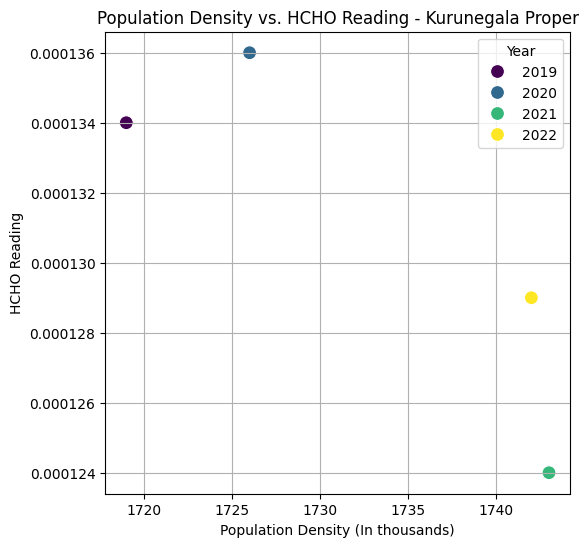

In [72]:
# Plotting Kurunegala
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Kurunegala_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Kurunegala Proper')
plt.legend(title='Year')
plt.grid(True)
plt.show()

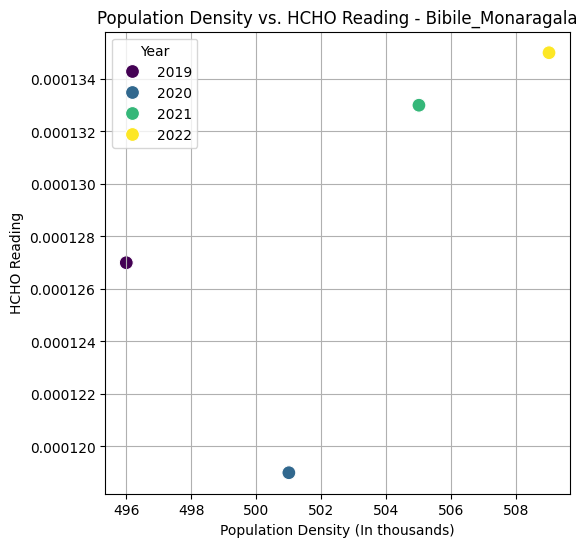

In [73]:
# Plotting Bibile_Monaragala
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Bibile_Monaragala_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Bibile_Monaragala')
plt.legend(title='Year')
plt.grid(True)
plt.show()

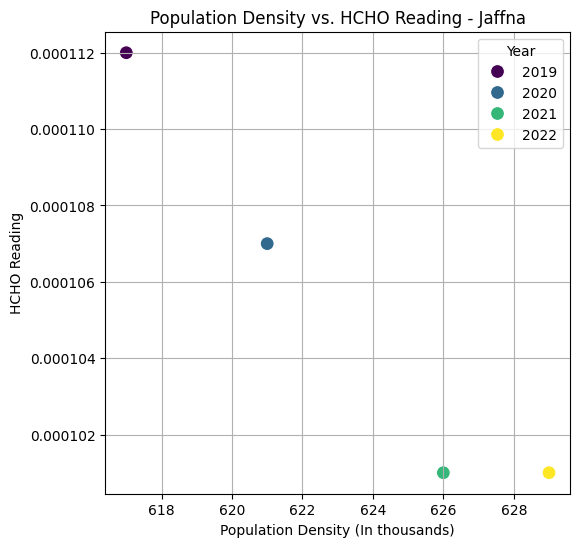

In [74]:
# Plotting Jaffna
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Jaffna_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Jaffna')
plt.legend(title='Year')
plt.grid(True)
plt.show()

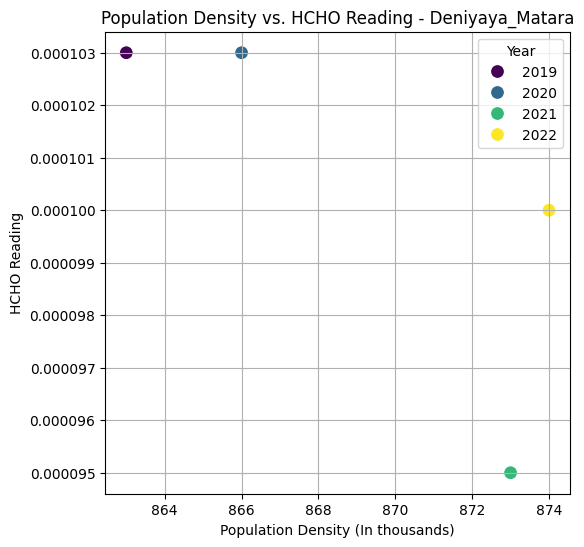

In [75]:
# Plotting Deniyaya_Matara
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Deniyaya_Matara_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Deniyaya_Matara')
plt.legend(title='Year')
plt.grid(True)
plt.show()

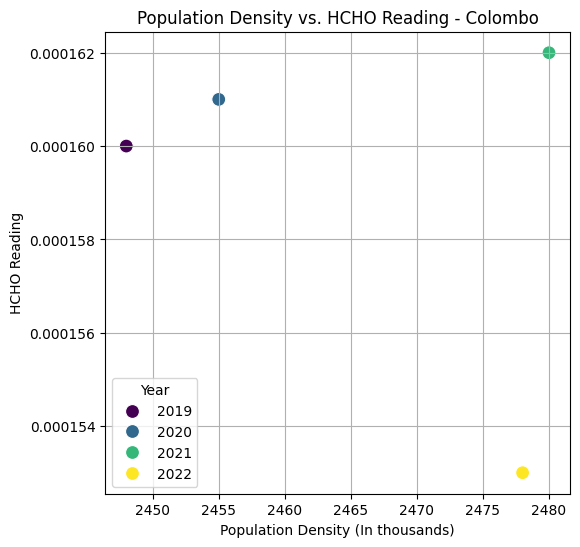

In [76]:
# Plotting Colombo
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Colombo_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Colombo')
plt.legend(title='Year')
plt.grid(True)
plt.show()

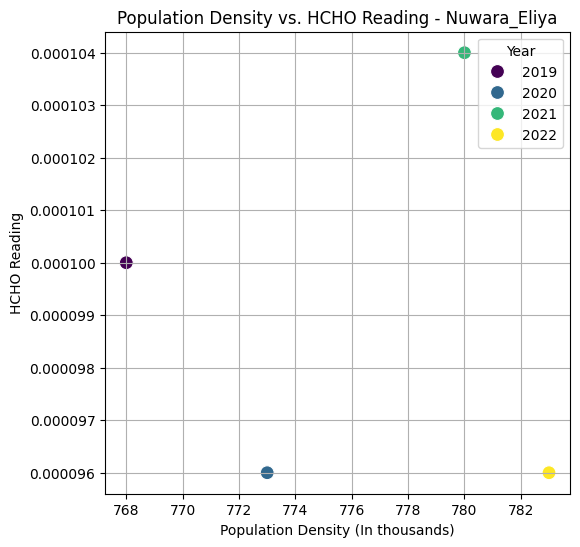

In [77]:
# Plotting Nuwara_Eliya_population
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Nuwara_Eliya_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Nuwara_Eliya')
plt.legend(title='Year')
plt.grid(True)
plt.show()

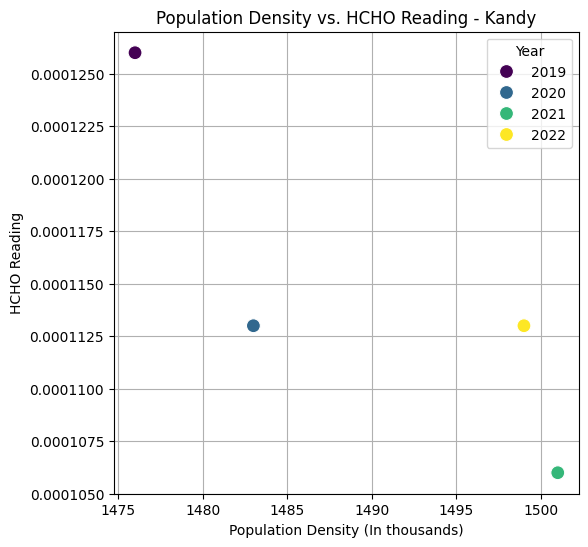

In [78]:
# Plotting Kandy_population
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Kandy_population, x='Population (In thousands)', y='HCHO Reading', hue='Year', palette='viridis', s=100)
plt.xlabel('Population Density (In thousands)')
plt.ylabel('HCHO Reading')
plt.title('Population Density vs. HCHO Reading - Kandy')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [79]:
Population_density=pd.concat([Kurunegala_population,Bibile_Monaragala_population,Jaffna_population,Deniyaya_Matara_population,Colombo_population,Nuwara_Eliya_population,Kandy_population])

In [80]:
Population_density.head()

,Population (In thousands),HCHO Reading,Year,location
0,1719,0.000134,2019,Kurunegala Proper
1,1726,0.000136,2020,Kurunegala Proper
2,1743,0.000124,2021,Kurunegala Proper
3,1742,0.000129,2022,Kurunegala Proper
0,496,0.000127,2019,"Bibile, Monaragala"


In [81]:
Population_density.to_csv('Population_density.csv')

#Feature Engineering

In [82]:
location_mapping = {
    'Kurunegala Proper': 1,
    'Bibile, Monaragala': 2,
    'Jaffna Proper': 3,
    'Deniyaya, Matara': 4,
    'Colombo Proper': 5,
    'Nuwara Eliya Proper': 6,
    'Kandy Proper': 7,
}
Entire_dataset['Location']=Entire_dataset['Location'].map(location_mapping)

In [83]:
Entire_dataset['Location'] = Entire_dataset['Location'].astype(int)

In [84]:
Entire_dataset.head()

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,1,2019-01-01,2019-01-02
1827,0.000137,1,2019-01-02,2019-01-03
1828,0.000148,1,2019-01-03,2019-01-04
1829,0.000198,1,2019-01-04,2019-01-05
1830,0.000249,1,2019-01-05,2019-01-06


In [85]:
# Convert date column to ordinal values
Entire_dataset['Current Date'] = Entire_dataset['Current Date'].apply(lambda x: x.toordinal())


In [86]:
# Convert date column to ordinal values
Entire_dataset['Next Date'] = Entire_dataset['Next Date'].apply(lambda x: x.toordinal())


In [87]:
Entire_dataset.head()

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,1,737060,737061
1827,0.000137,1,737061,737062
1828,0.000148,1,737062,737063
1829,0.000198,1,737063,737064
1830,0.000249,1,737064,737065


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the ordinal values
Entire_dataset['Current Date'] = scaler.fit_transform(Entire_dataset[['Current Date']])

In [89]:
Entire_dataset['Next Date'] = scaler.fit_transform(Entire_dataset[['Next Date']])

In [90]:
Entire_dataset.head()

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,1,0.000000,0.000000
1827,0.000137,1,0.000548,0.000548
1828,0.000148,1,0.001096,0.001096
1829,0.000198,1,0.001644,0.001644
1830,0.000249,1,0.002192,0.002192


#Machine Learning

In [91]:
import random
random.seed(42)

In [92]:
X = Entire_dataset.drop(columns=['HCHO reading']).values
y = Entire_dataset['HCHO reading'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [93]:
n_steps = X_train.shape[1]
n_features = 1

In [99]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/30
274/274 [==============================] - 2s 3ms/step - loss: 7.1772e-05
Epoch 2/30
274/274 [==============================] - 1s 3ms/step - loss: 1.1813e-06
Epoch 3/30
274/274 [==============================] - 1s 3ms/step - loss: 3.8928e-07
Epoch 4/30
274/274 [==============================] - 1s 3ms/step - loss: 1.0617e-07
Epoch 5/30
274/274 [==============================] - 1s 3ms/step - loss: 3.8506e-08
Epoch 6/30
274/274 [==============================] - 1s 3ms/step - loss: 2.4706e-08
Epoch 7/30
274/274 [==============================] - 1s 3ms/step - loss: 2.1150e-08
Epoch 8/30
274/274 [==============================] - 1s 3ms/step - loss: 2.0930e-08
Epoch 9/30
274/274 [==============================] - 1s 4ms/step - loss: 1.8648e-08
Epoch 10/30
274/274 [==============================] - 2s 5ms/step - loss: 1.9799e-08
Epoch 11/30
274/274 [==============================] - 2s 6ms/step - loss: 1.7234e-08
Epoch 12/30
274/274 [==============================] - 1s 4ms/s

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

medae = median_absolute_error(y_test, predictions)
print("Median Absolute Error (MedAE):", medae)


Mean Absolute Error (MAE): 0.00015729866577428544
Root Mean Squared Error (RMSE): 0.00020708282550965372
Median Absolute Error (MedAE): 0.0001226274368424068
